In [26]:
import itertools as it
import matplotlib.pyplot as plt

In [57]:
# Defining properties

compound_name = ["C4", "C3", "C2"]      # compound names
initial_laptime = [90, 91.5, 93]    # seconds
degradation = [0.3, 0.2, 0.1]       # seconds/lap
n_laps = 60
pit_loss = 20

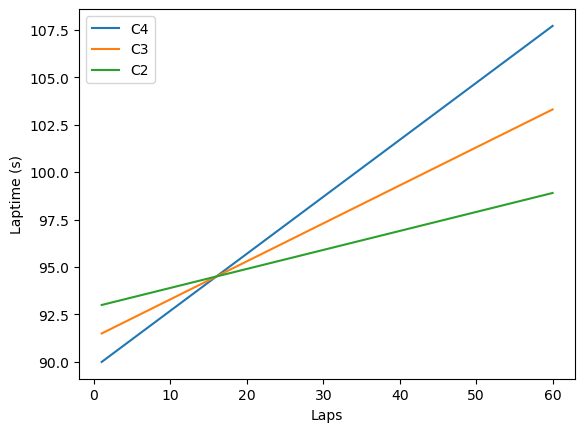

In [58]:
# Tyre data visualisation

c4 = [initial_laptime[0]]
c3 = [initial_laptime[1]]
c2 = [initial_laptime[2]]

for i in range(1, n_laps):
    c4.append(i * degradation[0] + initial_laptime[0])
    c3.append(i * degradation[1] + initial_laptime[1])
    c2.append(i * degradation[2] + initial_laptime[2])

laps = np.arange(1, n_laps + 1)

plt.plot(laps, c4, label = "C4")
plt.plot(laps, c3, label = "C3")
plt.plot(laps, c2, label = "C2")
plt.xlabel("Laps")
plt.ylabel("Laptime (s)")
plt.legend()

In [59]:
# Gather the compound data in one place
compound_data = {
    name: {"initial": ilt, "degradation": deg}
    for name, ilt, deg in zip(compound_name, initial_laptime, degradation)
}

# Define a total stint time function
def stint_time(compound, laps):
    i_time = compound_data[compound]["initial"]
    d = compound_data[compound]["degradation"]
    return sum(i_time + d * lap for lap in range(laps))

best_time = float('inf')    # Starts from positive infinity to then go down to the minimum
best_strategy = None

# Run all possible combinations
for cp1, cp2 in it.permutations(compound_data, 2):      # Starts with cp1 tyre, ends with cp2, runs permutations between all 3
    for pit_lap in range(1, n_laps - 1):
        stint1 = stint_time(cp1, pit_lap)
        stint2 = stint_time(cp2, n_laps - pit_lap)
        total_time = stint1 + stint2 + pit_loss

        if best_time > total_time:
            best_time = total_time
            best_strategy = (cp1, pit_lap, cp2)


start_tyre, best_pit_lap, end_tyre = best_strategy
# Output
print("Optimal Tyre Strategy")
print(f"Start with:      {start_tyre}")
print(f"Pit on lap:      {best_pit_lap}")
print(f"Switch to:       {end_tyre}")
print(f"Total time:     {best_time}")

Optimal Tyre Strategy
Start with:      C4
Pit on lap:      23
Switch to:       C2
Total time:     5673.5
